# Time Series Forecasting


# Data Pre Processing

###Importing Liabraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###Reading Data

In [132]:
f_birth = pd.read_csv('/content/Births2015.csv',parse_dates=[0])
f_birth.head()
new_birth = f_birth[['date','births']].copy()
df_birth = new_birth.set_index('date')

<ipython-input-132-09b30198848d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  f_birth = pd.read_csv('/content/Births2015.csv',parse_dates=[0])


In [34]:
df_birth.tail()

,births
date,
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458
2015-12-30,13100
2015-12-31,11608


In [35]:
series_value = pd.Series(df_birth.births)
series_value

date
2015-01-01     8068
2015-02-01    10850
2015-03-01     8328
2015-04-01     7065
2015-05-01    11892
              ...  
2015-12-27     7518
2015-12-28    13100
2015-12-29    13458
2015-12-30    13100
2015-12-31    11608
Name: births, Length: 365, dtype: int64

In [36]:
df_birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


# Identifying Trends in Data

### Stationery Series
A series which does not have any trend factor, which is constant series

<Axes: xlabel='date'>

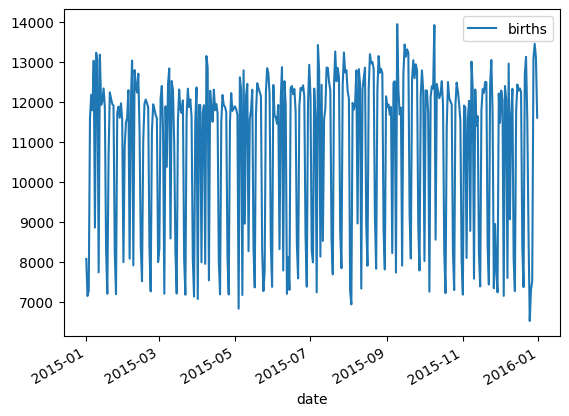

In [37]:
df_birth.plot()

###Moving Average

In Python, we can calculate the moving average using '.rolling()' method. This method provides rolling windows over the data, and we can use the mean function over these windows to calculate moving averages. The size of the window is passed as a parameter in the function .rolling(window).

<Axes: xlabel='date'>

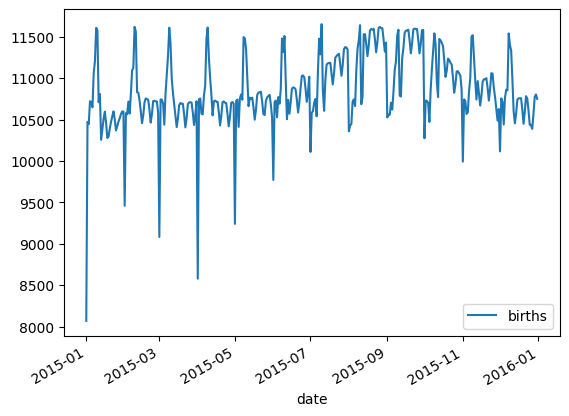

In [51]:
df_birth_mean = df_birth.rolling(window = 30, min_periods=1).mean()
df_birth_mean.plot()

# Model Creation

###Creating Baseline Model

In [52]:
# First Approach
values = pd.DataFrame(series_value) # To convert series into dataframe
model_data = pd.concat([values, values.shift(1)], axis = 1)
model_data.head()

,births,births
date,,
2015-01-01,8068,NaN
2015-02-01,10850,8068.0
2015-03-01,8328,10850.0
2015-04-01,7065,8328.0
2015-05-01,11892,7065.0


In [57]:
# Second approach
model_data_2 = pd.concat([df_birth,df_birth.shift(1)],axis = 1)
model_data_2.head()

,births,births
date,,
2015-01-01,8068,NaN
2015-02-01,10850,8068.0
2015-03-01,8328,10850.0
2015-04-01,7065,8328.0
2015-05-01,11892,7065.0


####Calculating Error

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np
test_data = model_data[1:]
test_data.columns = ['Actual_birth',"Forecast_birth"]
test_data.head()

,Actual_birth,Forecast_birth
date,,
2015-12-27,7518,7294.0
2015-12-28,13100,7518.0
2015-12-29,13458,13100.0
2015-12-30,13100,13458.0
2015-12-31,11608,13100.0


In [65]:
birth_Error = mean_squared_error(test_data.Actual_birth,test_data.Forecast_birth)
print('birth_Error = ',birth_Error)
print('sqrt of birth_Error = ',np.sqrt(birth_Error))

birth_Error =  5162403.576923077
sqrt of birth_Error =  2272.092334594498


##Creating ARIMA [AutoRegressive Integrated Moving Average] Model

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Identifying Attribute [p,d,q] values

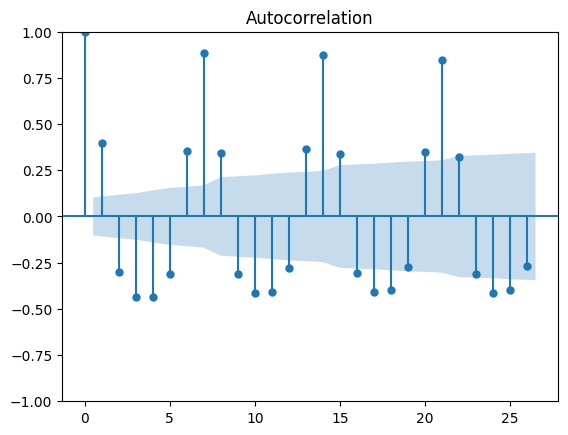

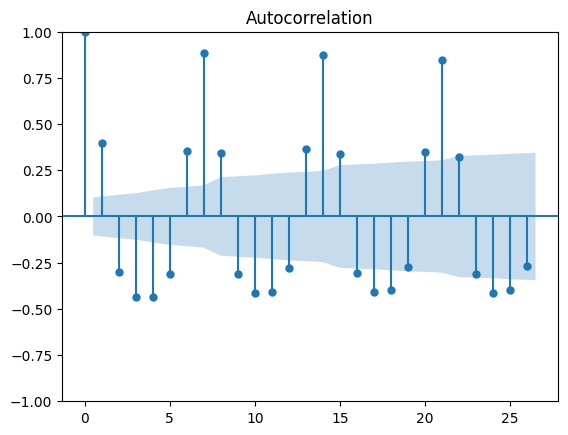

In [67]:
plot_acf(df_birth)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


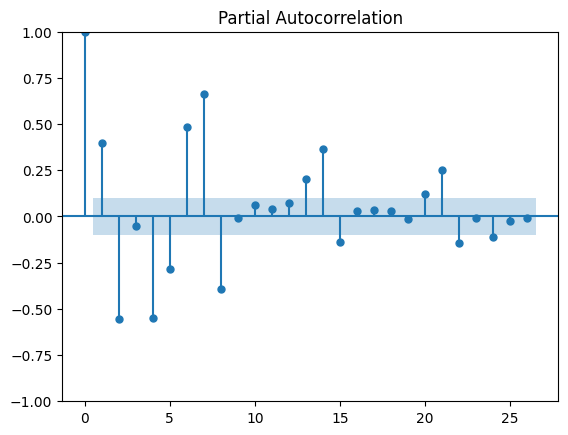

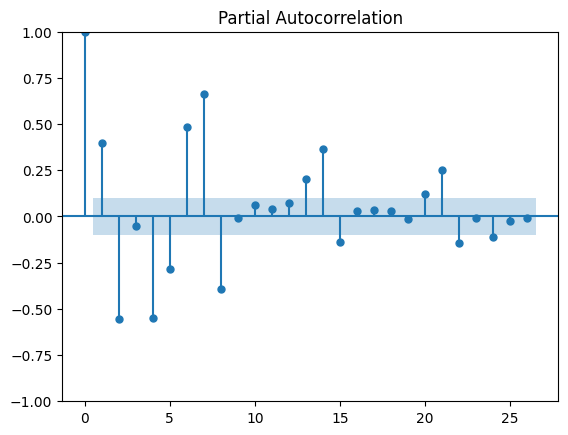

In [68]:
plot_pacf(df_birth)

###Spliting data into train & test

In [70]:
print('df_birth: ',df_birth.size)
birth_train = df_birth[0:330]
birth_test = df_birth[330:365]
print('Training Data: ',birth_train.size)
print('Testing Data: ',birth_test.size)

df_birth:  365
Training Data:  330
Testing Data:  35


In [74]:
birth_train.head()

,births
date,
2015-01-01,8068
2015-02-01,10850
2015-03-01,8328
2015-04-01,7065
2015-05-01,11892


###Model Fitting

In [76]:
from statsmodels.tsa.arima.model import ARIMA

In [129]:
birth_model = ARIMA(birth_train, order = (4,1,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [130]:
birth_model_fit = birth_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [131]:
birth_model_fit.aic

5550.768785620985

In [123]:
birth_forecast = birth_model_fit.forecast(steps = 35)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


###Calculating Error

In [124]:
birth_forecast

330    11124.468295
331    11028.864583
332     7301.016906
333    10399.452764
334    14815.144350
335    12035.221346
336     8873.008900
337    10255.852681
338    10201.743501
339     8533.113340
340    10708.604021
341    13602.257799
342    12084.462372
343     9724.645726
344     9861.666612
345     9761.078719
346     9204.570935
347    10905.479036
348    12906.499374
349    12035.622347
350    10190.047300
351     9703.176772
352     9546.004190
353     9579.440605
354    11022.427226
355    12493.403235
356    11952.620168
357    10440.495486
358     9659.537281
359     9460.277681
360     9797.471595
361    11086.087924
362    12235.120109
363    11862.524672
364    10572.184839
Name: predicted_mean, dtype: float64

In [97]:
birth_test

,births
date,
2015-11-27,8942
2015-11-28,7734
2015-11-29,7230
2015-11-30,12214
2015-01-12,13185
2015-02-12,12708
2015-03-12,12281
2015-04-12,11828
2015-05-12,8262


In [125]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

1790.0115204498204